In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';')
test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',')
hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',')

In [3]:
# storing length of datasets 
train_len = train.shape[0] 
test_len = test.shape[0]
All_data = pd.concat((train,test,hidden)).reset_index(drop=True) 

lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
All_data['Lithology'] = All_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
All_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,Lithology
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,35/9-7,2973.2988,536096.06250,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,136.911575,NaN,0.502458,NaN,2.311106,24.306124,NaN,65000,2.0,Shale
1429690,35/9-7,2973.4508,536096.06250,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,137.583923,NaN,0.374753,NaN,1.853418,22.201078,NaN,65000,2.0,Shale
1429691,35/9-7,2973.6028,536096.06250,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,138.310898,NaN,0.211487,NaN,1.325961,20.096741,NaN,65000,2.0,Shale
1429692,35/9-7,2973.7548,536096.06250,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,137.592819,NaN,0.147950,NaN,1.260347,17.992323,NaN,65000,2.0,Shale


In [4]:
#dropping columns with high missing values
drop_cols = ['SGR', 'ROPA', 'RXO', 'MUDWEIGHT','DCAL','RMIC','FORCE_2020_LITHOFACIES_CONFIDENCE']
All_data_drop = All_data.drop(drop_cols, axis=1)
# encoding categorical variables
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP'].astype('category')
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP_encoded'].cat.codes

All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION'].astype('category')
All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION_encoded'].cat.codes

All_data_drop['WELL_encoded'] = All_data_drop['WELL'].astype('category')
All_data_drop['WELL_encoded'] = All_data_drop['WELL_encoded'].cat.codes

All_data_drop['Lithology_encoded'] = All_data_drop['FORCE_2020_LITHOFACIES_LITHOLOGY'].astype('category')
All_data_drop['Lithology_encoded'] = All_data_drop['Lithology_encoded'].cat.codes

In [5]:
All_data_drop

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,BS,ROP,DTS,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,Lithology,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,34.636410,NaN,-0.574928,65000,Shale,6,-1,1,1
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,34.636410,NaN,-0.570188,65000,Shale,6,-1,1,1
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,34.779556,NaN,-0.574245,65000,Shale,6,-1,1,1
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,39.965164,NaN,-0.586315,65000,Shale,6,-1,1,1
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,57.483765,NaN,-0.597914,65000,Shale,6,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,35/9-7,2973.2988,536096.06250,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,8.5,15.195305,136.911575,0.502458,65000,Shale,0,16,113,1
1429690,35/9-7,2973.4508,536096.06250,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,8.5,15.770223,137.583923,0.374753,65000,Shale,0,16,113,1
1429691,35/9-7,2973.6028,536096.06250,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,8.5,16.418465,138.310898,0.211487,65000,Shale,0,16,113,1
1429692,35/9-7,2973.7548,536096.06250,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,8.5,17.037945,137.592819,0.147950,65000,Shale,0,16,113,1


In [6]:
#dropping categorial features replaces beforehan by encoded features
drop2 = All_data_drop.drop(['GROUP', 'FORMATION','WELL','FORCE_2020_LITHOFACIES_LITHOLOGY','Lithology'], axis=1)

# splitting dataset into training, test, and hidden sets
train_prep = drop2[:train_len].copy()
test_prep = drop2[train_len:(train_len+test_len)].copy()
hidden_prep = drop2[(train_len+test_len):].copy()

In [7]:
drop2

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,NaN,34.636410,NaN,-0.574928,6,-1,1,1
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,NaN,34.636410,NaN,-0.570188,6,-1,1,1
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,NaN,34.779556,NaN,-0.574245,6,-1,1,1
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,NaN,39.965164,NaN,-0.586315,6,-1,1,1
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,NaN,57.483765,NaN,-0.597914,6,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429689,2973.2988,536096.06250,6793022.0,-2943.444580,8.276272,NaN,2.820439,3.158570,NaN,90.720284,...,75.260658,NaN,8.5,15.195305,136.911575,0.502458,0,16,113,1
1429690,2973.4508,536096.06250,6793022.0,-2943.595947,8.267273,NaN,3.020778,3.332977,NaN,87.062027,...,74.868301,NaN,8.5,15.770223,137.583923,0.374753,0,16,113,1
1429691,2973.6028,536096.06250,6793022.0,-2943.747559,8.250099,NaN,2.795711,3.044179,NaN,86.115921,...,74.848122,NaN,8.5,16.418465,138.310898,0.211487,0,16,113,1
1429692,2973.7548,536096.06250,6793022.0,-2943.899170,NaN,NaN,2.658694,2.847681,NaN,89.497131,...,74.964027,NaN,8.5,17.037945,137.592819,0.147950,0,16,113,1


In [8]:
train_prep1= train_prep.copy()
test_prep1= test_prep.copy()
hidden_prep1= hidden_prep.copy()

In [9]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(train_prep)
train_imp = miss.fit_transform(train_prep)
train_imp=pd.DataFrame(train_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
         'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','Lithology_encoded'])
train_imp

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,1.39902,1.611410,1.798681,1.884186,80.200851,...,161.131180,24.612379,12.250001,34.636410,188.200653,-0.574928,6.0,-1.0,1.0,1.0
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,1.39902,1.618070,1.795641,1.889794,79.262886,...,160.603470,23.895531,12.250001,34.636410,188.200653,-0.570188,6.0,-1.0,1.0,1.0
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,1.39902,1.626459,1.800733,1.896523,74.821999,...,160.173615,23.916357,12.250001,34.779556,188.200653,-0.574245,6.0,-1.0,1.0,1.0
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,1.39902,1.621594,1.801517,1.891913,72.878922,...,160.149429,23.793688,12.250001,39.965164,188.200653,-0.586315,6.0,-1.0,1.0,1.0
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,1.39902,1.602679,1.795299,1.880034,71.729141,...,160.128342,24.104078,12.250001,57.483765,188.200653,-0.597914,6.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,476920.31250,6737311.0,-2042.784973,8.423170,1.39902,1.443584,1.439000,2.527984,77.654900,...,109.585163,55.390942,8.500000,27.674368,188.200653,-0.001763,11.0,7.0,117.0,0.0
1170507,3169.4644,476920.31250,6737311.0,-2042.784973,8.379244,1.39902,1.443584,1.439000,2.537613,75.363937,...,109.585163,55.390942,8.500000,28.024338,188.200653,-0.007600,11.0,7.0,117.0,2.0
1170508,3169.6164,476920.31250,6737311.0,-2042.784973,8.350248,1.39902,1.443584,1.439000,2.491860,66.452843,...,109.585163,55.390942,8.500000,28.091282,188.200653,-0.018297,11.0,7.0,117.0,2.0
1170509,3169.7684,476920.31250,6737311.0,-2042.784973,8.313779,1.39902,1.443584,1.439000,2.447539,55.784817,...,109.585163,55.390942,8.500000,28.019775,188.200653,-0.011438,11.0,7.0,117.0,2.0


In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
train_imp1= train_imp.copy()

#Method 1: Local Oultlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(train_imp1)
mask = yhat != -1
train_out = train_imp1[mask]
#display(train_data_lof)

In [11]:
train_out.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,819358.000000,819358.000000,8.193580e+05,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,...,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000,819358.000000
mean,2162.932582,484862.617017,6.681289e+06,-2117.426410,13.242912,5.515119,3.995405,9.399813,2.285293,70.393558,...,114.142838,58.882125,12.115220,73.145847,190.689049,0.015893,6.609289,36.466222,57.437208,1.443589
std,994.326969,34247.561106,1.283499e+05,963.637545,3.649807,67.313737,46.410062,107.420046,0.233716,33.326076,...,28.805210,65.694450,2.534017,1054.368449,27.347709,0.183905,3.072323,24.115683,31.979873,1.691963
min,136.086000,426898.781250,6.406641e+06,-5395.116211,2.344000,0.000100,0.039904,0.032695,0.818682,0.624403,...,7.967859,-999.000000,6.000000,-0.117977,93.068260,-3.450083,-1.000000,-1.000000,1.000000,0.000000
25%,1396.081243,454469.531250,6.593126e+06,-2784.745117,10.371266,1.279053,0.920259,0.902854,2.117745,47.464062,...,90.074266,41.475492,12.250001,17.799999,188.200653,-0.006840,5.000000,16.000000,34.000000,1.000000
50%,2056.121000,476900.703125,6.737311e+06,-2036.209411,12.555752,1.399020,1.443584,1.425993,2.321228,68.242973,...,109.585163,55.390942,12.250001,17.799999,188.200653,0.001752,6.000000,37.000000,56.000000,1.000000
75%,2842.487750,519372.578125,6.784884e+06,-1376.652771,16.164530,1.456188,2.457151,2.435580,2.455249,88.722691,...,140.400463,70.116478,12.250001,17.799999,188.200653,0.015074,9.000000,58.000000,84.000000,1.000000
max,5436.176000,572632.750000,6.856661e+06,-111.085991,28.278999,2043.105957,1950.000000,1999.877808,3.396956,645.004517,...,277.922882,526.547302,26.000002,43085.335938,607.898010,2.771416,13.000000,69.000000,117.000000,11.000000


In [12]:
#Method 2: Isolation Forest
isolation = IsolationForest(contamination=0.1)
yhat1 = isolation.fit_predict(train_imp1)
mask1 = yhat1 != -1
train_iso = train_imp1[mask1]

In [13]:
train_iso.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,...,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06,1.053460e+06
mean,2.119048e+03,4.851303e+05,6.683495e+06,-2.074347e+03,1.323027e+01,2.187434e+00,2.219458e+00,2.126131e+00,2.283333e+00,7.100953e+01,...,1.150019e+02,5.947009e+01,1.214347e+01,2.529589e+01,1.915934e+02,6.332773e-03,6.632702e+00,3.693058e+01,5.690563e+01,1.404148e+00
std,9.287378e+02,3.394100e+04,1.249335e+05,8.968893e+02,3.531915e+00,1.519945e+01,3.841179e+00,3.518325e+00,2.184672e-01,3.173068e+01,...,2.769211e+01,5.317590e+01,2.416934e+00,1.267325e+02,2.749287e+01,7.239669e+00,2.995051e+00,2.384750e+01,3.122101e+01,1.582193e+00
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.198163e+03,2.347244e+00,1.000000e-04,-8.418695e-03,3.170056e-02,1.005849e+00,1.092843e-01,...,7.415132e+00,-9.990000e+02,6.000000e+00,-1.179770e-01,6.916318e+01,-7.429339e+03,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,1.409015e+03,4.548002e+05,6.598748e+06,-2.716270e+03,1.093522e+01,1.264102e+00,9.068038e-01,8.839003e-01,2.119896e+00,4.867719e+01,...,9.186674e+01,4.347719e+01,1.225000e+01,1.780000e+01,1.882007e+02,-6.489766e-03,5.000000e+00,2.000000e+01,3.400000e+01,1.000000e+00
50%,2.016558e+03,4.769203e+05,6.737311e+06,-1.994411e+03,1.255575e+01,1.399020e+00,1.417216e+00,1.385771e+00,2.321228e+00,6.897099e+01,...,1.095852e+02,5.539094e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.752000e-03,6.000000e+00,3.700000e+01,5.600000e+01,1.000000e+00
75%,2.774152e+03,5.194764e+05,6.784873e+06,-1.388008e+03,1.589728e+01,1.399020e+00,2.260572e+00,2.233023e+00,2.443688e+00,8.886350e+01,...,1.401001e+02,7.024378e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.647896e-02,9.000000e+00,5.800000e+01,8.000000e+01,1.000000e+00
max,5.234776e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.800712e+01,1.978453e+03,1.950000e+03,4.257682e+02,3.300723e+00,8.439030e+02,...,3.204789e+02,5.154411e+02,2.600000e+01,2.685853e+04,6.765781e+02,2.587779e+00,1.300000e+01,6.900000e+01,1.170000e+02,1.100000e+01


In [14]:
#Method 3: Standard Deviation Method (traditional)
train_std = train_imp1[np.abs(train_imp1-train_imp1.mean()) <= (3*train_imp1.std())]
train_std = train_std.dropna()   

In [15]:
train_std.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,...,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06,1.046472e+06
mean,2.200380e+03,4.846716e+05,6.682054e+06,-2.154476e+03,1.308898e+01,2.480076e+00,3.027539e+00,3.062930e+00,2.300645e+00,6.940062e+01,...,1.128481e+02,6.205189e+01,1.201038e+01,2.518895e+01,1.872509e+02,2.092095e-02,6.574938e+00,3.657593e+01,5.755807e+01,1.278876e+00
std,9.861268e+02,3.469924e+04,1.287025e+05,9.563323e+02,3.606502e+00,5.929236e+00,6.417174e+00,8.890982e+00,2.218563e-01,2.917787e+01,...,2.881490e+01,4.527740e+01,2.423327e+00,6.957510e+01,1.354023e+01,1.928843e-01,3.109477e+00,2.382366e+01,3.197170e+01,1.132712e+00
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.037141e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,1.583494e+00,8.989213e-01,...,2.630028e+01,-1.386687e+02,6.000000e+00,-1.179770e-01,1.064682e+02,-6.043000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,1.437571e+03,4.544695e+05,6.593126e+06,-2.826209e+03,9.785031e+00,1.324630e+00,9.405243e-01,9.234532e-01,2.130784e+00,4.803510e+01,...,8.890809e+01,4.420634e+01,1.225000e+01,1.780000e+01,1.882007e+02,-6.730869e-03,5.000000e+00,1.800000e+01,3.300000e+01,1.000000e+00
50%,2.102051e+03,4.768720e+05,6.737311e+06,-2.066825e+03,1.255575e+01,1.399020e+00,1.443584e+00,1.451737e+00,2.321228e+00,6.772841e+01,...,1.095852e+02,5.539094e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.752000e-03,6.000000e+00,3.700000e+01,5.700000e+01,1.000000e+00
75%,2.884856e+03,5.189150e+05,6.787698e+06,-1.414214e+03,1.571688e+01,1.510908e+00,2.594750e+00,2.528414e+00,2.470409e+00,8.790154e+01,...,1.393764e+02,7.160407e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.722218e-02,9.000000e+00,5.800000e+01,8.000000e+01,1.000000e+00
max,5.069856e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.410997e+01,2.280023e+02,1.659956e+02,3.504934e+02,2.995986e+00,1.736000e+02,...,1.999502e+02,2.563050e+02,1.864034e+01,3.190913e+03,2.748403e+02,2.836938e+00,1.300000e+01,6.900000e+01,1.170000e+02,6.000000e+00


In [16]:
#Method 4: One-class SVM
svm = OneClassSVM(nu=0.1)
that = svm.fit_predict(train_imp1)
mask = that != -1
train_svm = train_imp1[mask]


In [17]:
train_svm.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,DTC,SP,BS,ROP,DTS,DRHO,GROUP_encoded,FORMATION_encoded,WELL_encoded,Lithology_encoded
count,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,...,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06,1.053725e+06
mean,2.160797e+03,4.871959e+05,6.686539e+06,-2.118004e+03,1.315211e+01,6.087600e+00,5.171589e+00,5.839051e+00,2.281993e+00,7.117133e+01,...,1.130293e+02,5.878640e+01,1.206852e+01,7.688419e+01,1.908533e+02,1.162731e-02,6.600367e+00,3.745242e+01,5.686855e+01,1.446098e+00
std,9.767666e+02,3.466884e+04,1.144169e+05,9.494604e+02,3.652369e+00,7.249466e+01,5.661257e+01,5.788235e+01,2.410787e-01,3.411218e+01,...,2.847331e+01,6.871894e+01,2.517365e+00,1.098386e+03,2.868652e+01,7.240299e+00,3.159572e+00,2.366695e+01,3.091648e+01,1.725880e+00
min,1.360860e+02,4.367908e+05,6.452288e+06,-5.395563e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,7.415132e+00,-9.990000e+02,6.000000e+00,-1.179770e-01,6.916318e+01,-7.429339e+03,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,1.421618e+03,4.577945e+05,6.603730e+06,-2.757769e+03,9.924485e+00,1.297631e+00,9.204811e-01,9.157644e-01,2.108398e+00,4.758480e+01,...,8.928014e+01,4.205318e+01,1.225000e+01,1.780000e+01,1.882007e+02,-6.960318e-03,5.000000e+00,2.100000e+01,3.400000e+01,1.000000e+00
50%,2.047336e+03,4.769203e+05,6.737311e+06,-2.026127e+03,1.255575e+01,1.399020e+00,1.443584e+00,1.439000e+00,2.321228e+00,6.892023e+01,...,1.095852e+02,5.539094e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.752000e-03,6.000000e+00,3.800000e+01,5.500000e+01,1.000000e+00
75%,2.814434e+03,5.205603e+05,6.783876e+06,-1.401505e+03,1.578499e+01,1.593863e+00,2.676960e+00,2.550455e+00,2.461529e+00,8.938073e+01,...,1.391917e+02,7.079415e+01,1.225000e+01,1.780000e+01,1.882007e+02,1.762178e-02,9.000000e+00,5.800000e+01,7.800000e+01,1.000000e+00
max,5.436632e+03,5.726328e+05,6.829525e+06,-1.110860e+02,2.827900e+01,2.193905e+03,1.988616e+03,1.999878e+03,3.457820e+00,1.076964e+03,...,3.204789e+02,5.265473e+02,2.600000e+01,4.701512e+04,6.765781e+02,2.836938e+00,1.300000e+01,6.900000e+01,1.170000e+02,1.100000e+01


In [18]:
#Checking number of points remaining after outlier removal
print('Number of points before outliers removed                       :', len(train_imp1))
print('Number of points after outliers removed with Outlier Factor    :', len(train_out))
print('Number of points after outliers removed with Isolation Forest  :', len(train_iso))
print('Number of points after outliers removed with Standard Deviation:', len(train_std))
print('Number of points after outliers removed with One-class SVM     :', len(train_svm))

Number of points before outliers removed                       : 1170511
Number of points after outliers removed with Outlier Factor    : 819358
Number of points after outliers removed with Isolation Forest  : 1053460
Number of points after outliers removed with Standard Deviation: 1046472
Number of points after outliers removed with One-class SVM     : 1053725


C:\Users\Ayori\AppData\Local\Temp/ipykernel_15012/145786846.py:30: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.7)


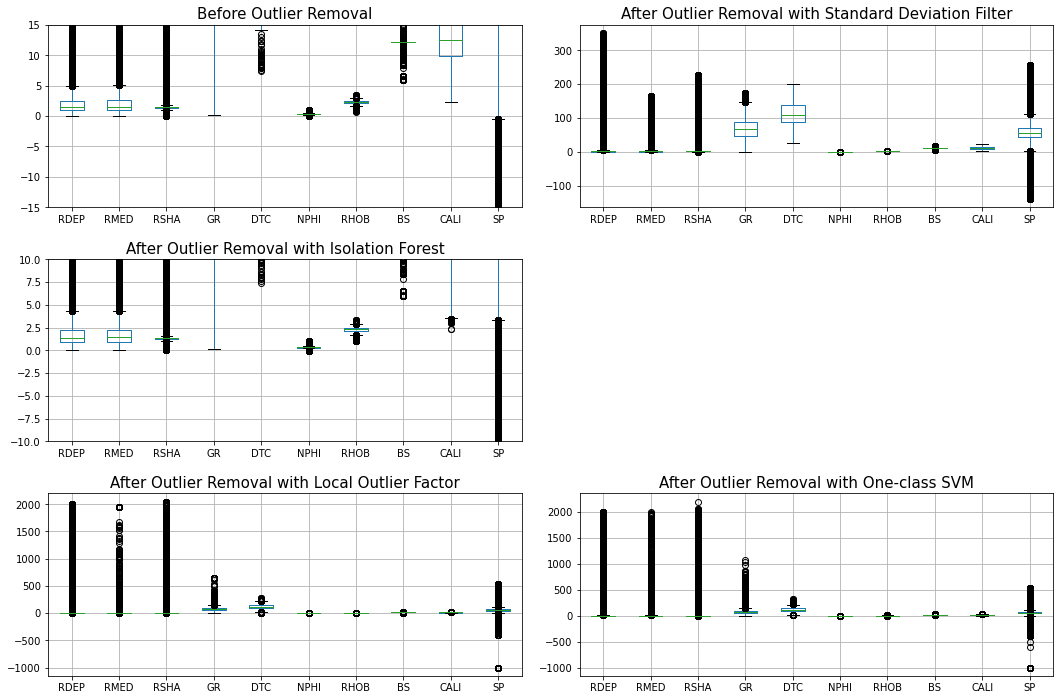

In [19]:
#Box plotting data after outlier removal
box_features = ['RDEP','RMED', 'RSHA','GR', 'DTC', 'NPHI', 'RHOB', 'BS', 'CALI','SP']

plt.figure(figsize=(15,10))

#Before outliers removal
plt.subplot(3,2,1)
train_imp1[box_features].boxplot()
plt.ylim([-15, 15])
plt.title('Before Outlier Removal', size=15)

#Methods of outlier removal
plt.subplot(3,2,2)
train_std[box_features].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
train_iso[box_features].boxplot()
plt.ylim([-10, 10])
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
train_out[box_features].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,5)
train_svm[box_features].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()